1. Data cleaning
- Handle missing values
- Remove duplicates
- Address outliers
2. EDA, including checking for missing values and to identify anomalies and outliers

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/BT4012 Project/Datasets/airbnb-fraud.csv" # use your own path

df = pd.read_csv(dataset_path, header=0)

In [ ]:
df.head()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,1.0,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,1.0,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,2.0,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,1.0,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,1.0,4,1794,15400,30,18,91.0,0,1,0.21,0


# Section 1: Data Cleaning

In [ ]:
# Summary Statistics
df.describe()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,1.607531,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,1.010933,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,16.000000,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


## 1.1 Check for and Remove duplicated rows


In [ ]:
df.duplicated().sum()

36

In [ ]:
df = df.drop_duplicates()

## 1.2 Check for missing values

In [ ]:
df.isnull().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

We find that there are no missing values in this dataset.

In [ ]:
dtypes  = df.dtypes
unique_values = df.nunique()

df_summary  = pd.DataFrame({
    "datatypes":dtypes,
    "unique_values":unique_values,
})

df_summary

,datatypes,unique_values
host_response_rate,int64,52
host_identity_verified,int64,2
host_total_listings_count,int64,35
city,int64,38
is_location_exact,int64,2
property_type,int64,13
room_type,int64,3
accommodates,int64,14
bathrooms,float64,12
bedrooms,float64,6


In [ ]:
df.shape

(3549, 21)

In [ ]:
df.to_csv('/content/drive/MyDrive/BT4012 Project/Datasets/airbnb-fraud-cleaned.csv', index=False, header=True, encoding='utf-8')

# Section 2: Exploratory Data Analysis

## 2.1 Summary Statistics

In [ ]:
df.describe()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3549.00000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000,3549.000000
mean,95.61623,0.723584,54.038039,2.828684,0.857706,1.892364,0.433362,3.031558,1.217103,1.253874,1.607777,3.908988,1569.582981,17371.428571,3.139194,19.237532,93.686391,0.167371,1.202029,1.774193,0.216117
std,11.84358,0.447288,162.367256,4.091121,0.349400,3.338853,0.539189,1.781028,0.499428,0.751597,1.014832,0.513516,876.729791,14891.091884,8.902631,35.699788,9.062727,0.373359,0.878810,1.932899,0.411653
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,835.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1601.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2288.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.140000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,16.000000,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


## 2.2 Visualize Feature Distribution

array([[<Axes: title={'center': 'host_response_rate'}>,
        <Axes: title={'center': 'host_identity_verified'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'is_location_exact'}>],
       [<Axes: title={'center': 'property_type'}>,
        <Axes: title={'center': 'room_type'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'bed_type'}>,
        <Axes: title={'center': 'amenities'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'instant_bookable'}>,
        <Axes: title={'center': 'cancellation_policy'}>,
        <Axes: title={'cen

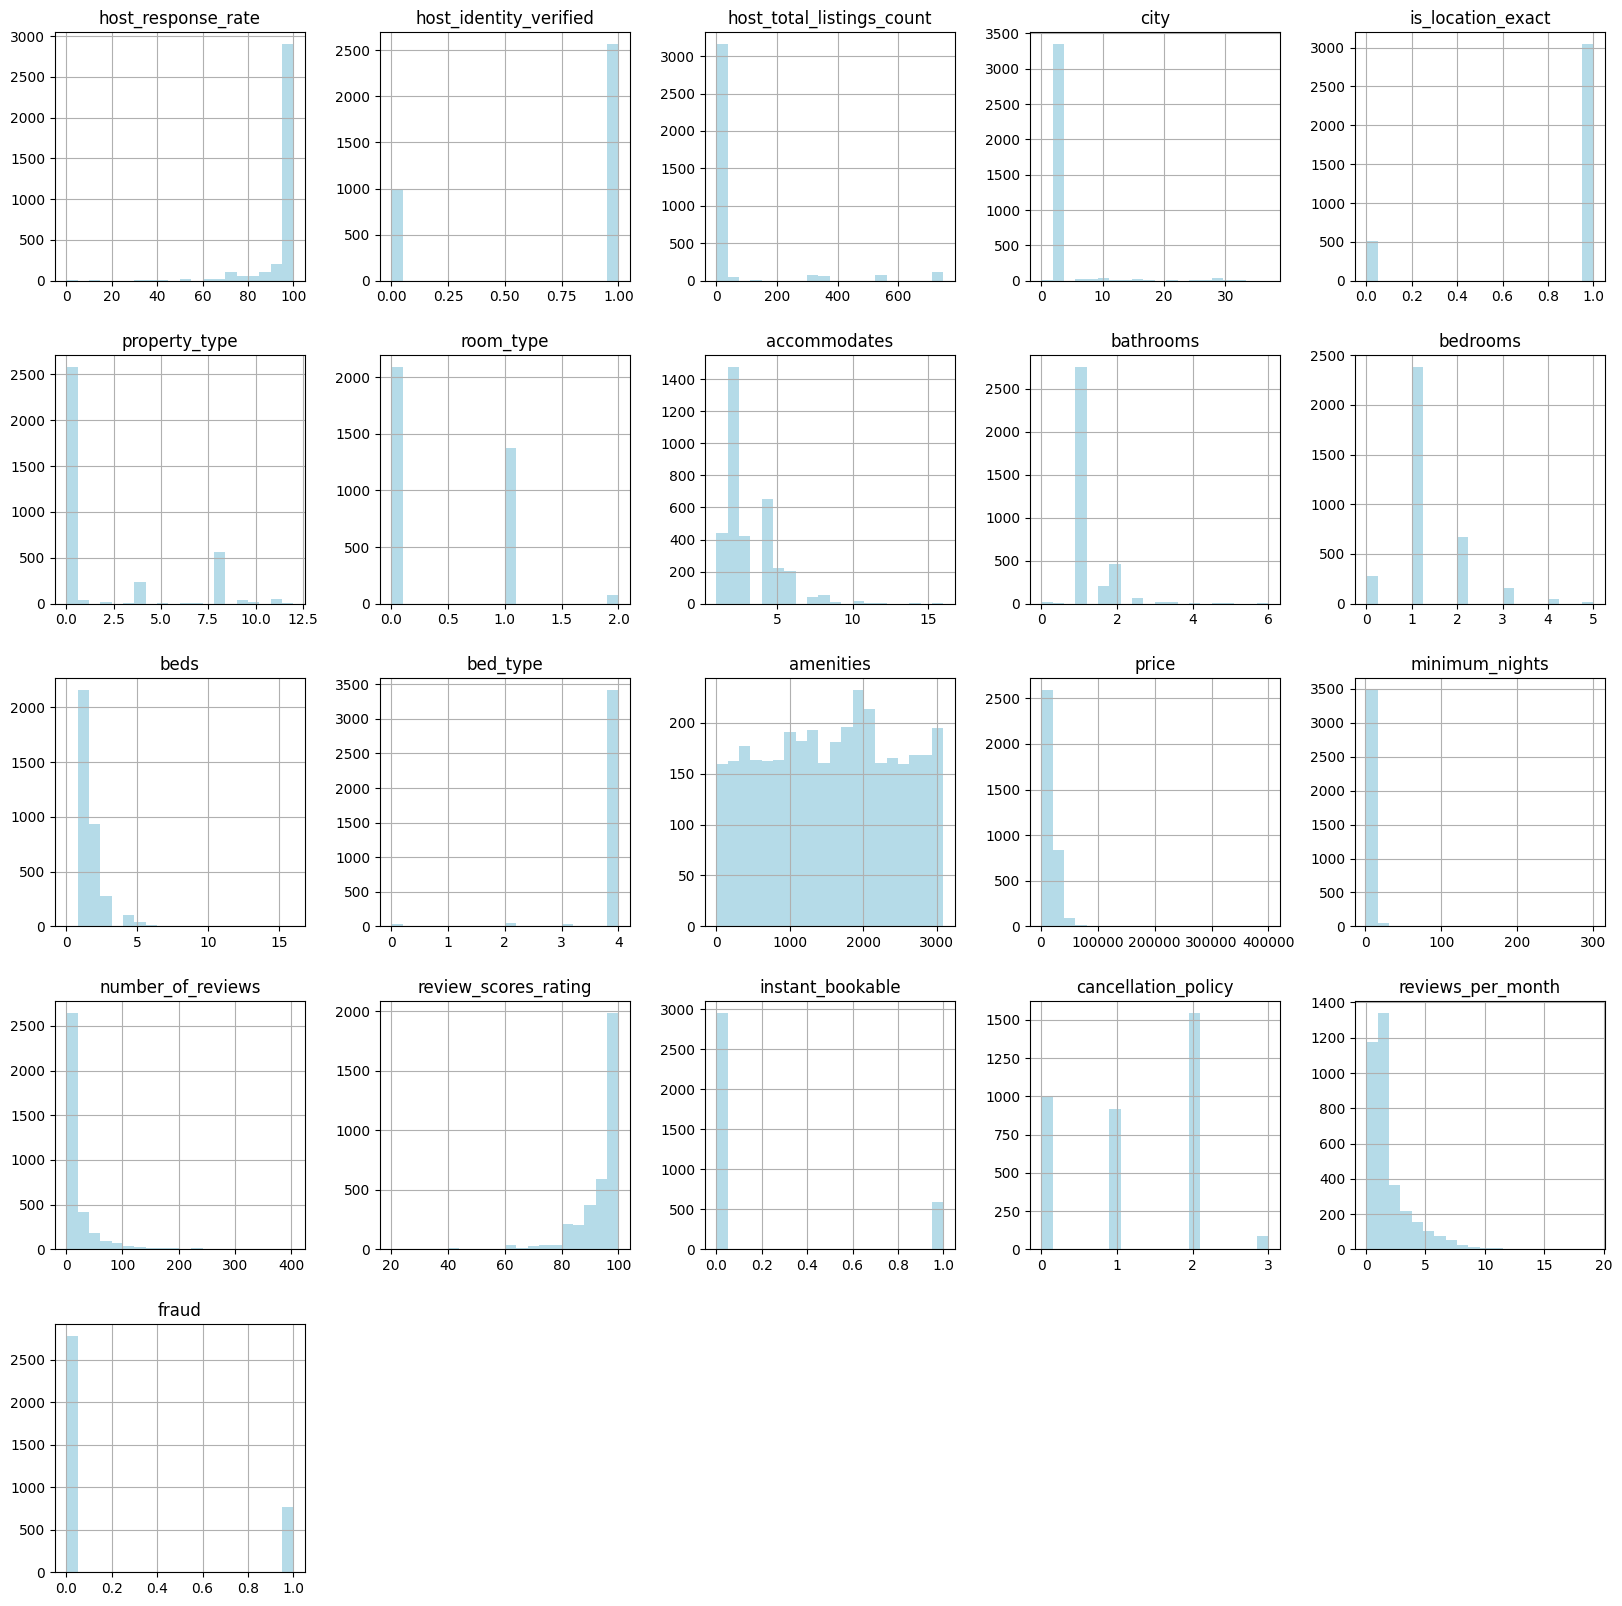

In [ ]:
df.hist(bins=20, figsize=(20,20), color='lightblue', alpha=0.9)

Based on the histograms above, numerical variables tend to either left-skewed or right-skewed, so there is a need to normalize these values in our data preprocessing.

## 2.3 Check if Target Variable (fraud) is balanced

In [ ]:
# Percentage of each class
df['fraud'].value_counts(normalize=True) * 100

0    78.388278
1    21.611722
Name: fraud, dtype: float64

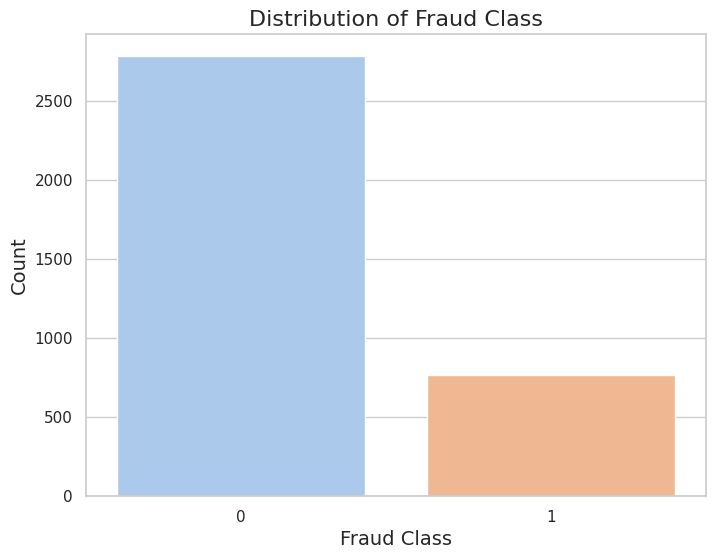

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=df, palette='pastel')

plt.title('Distribution of Fraud Class', fontsize=16)
plt.xlabel('Fraud Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Target class has an uneven distribution of observations (non-fraudulent observations comprise 78.39% of all observations whereas fraudulent observations only make up 21.61%). This results in an unbalanced dataset.

We perform various techniques during  to balance the target variable classes to gain a better representation of each class.

## 2.4 Barplot of *host_identity_verified* vs *fraud*

Text(0, 0.5, 'Count')

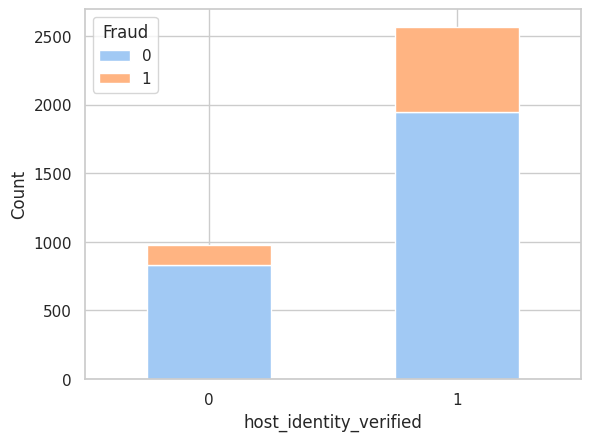

In [ ]:
counts = df.groupby(['host_identity_verified', 'fraud']).size().unstack(fill_value=0)

sns.set(style='whitegrid')
sns.set_palette('pastel')

ax = counts.plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Fraud', labels=['0', '1'])
plt.ylabel('Count')

In [ ]:
counts.div(counts.sum(axis=0), axis=1) * 100

fraud,0,1
host_identity_verified,,
0,29.942487,19.295958
1,70.057513,80.704042


## 2.5 Correlation Matrix

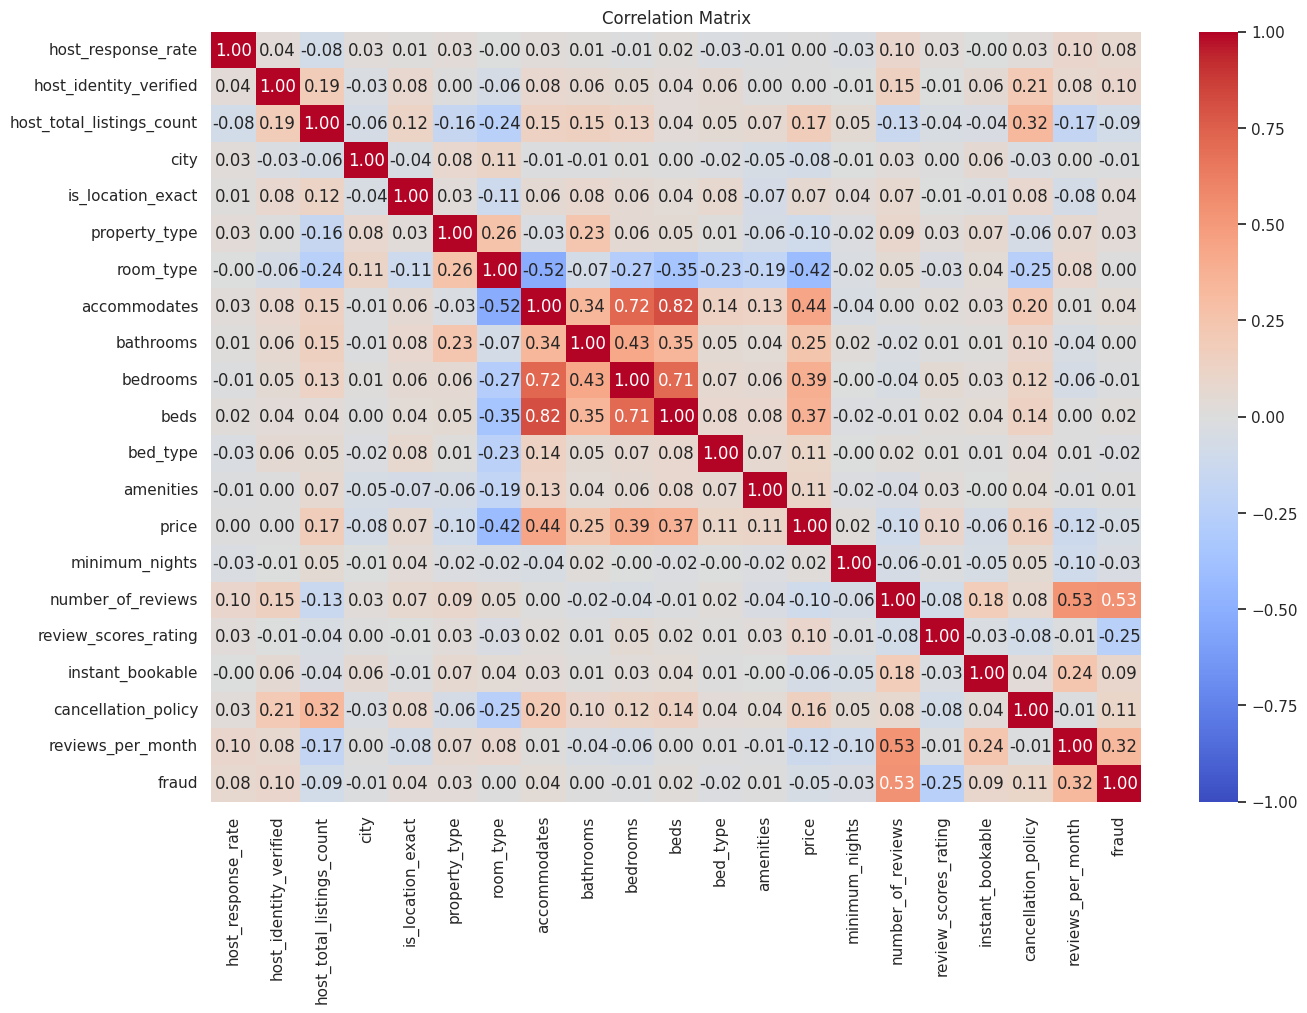

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Observe which features are highly correlated with 'fraud'
corr_matrix = df.corr()

corr_matrix['fraud'].sort_values(ascending=False)

fraud                        1.000000
number_of_reviews            0.532263
reviews_per_month            0.321267
cancellation_policy          0.108328
host_identity_verified       0.097983
instant_bookable             0.087338
host_response_rate           0.075115
accommodates                 0.039517
is_location_exact            0.035545
property_type                0.034360
beds                         0.021478
amenities                    0.007541
bathrooms                    0.002031
room_type                    0.000777
bedrooms                    -0.008856
city                        -0.014158
bed_type                    -0.020258
minimum_nights              -0.034821
price                       -0.051955
host_total_listings_count   -0.085581
review_scores_rating        -0.245719
Name: fraud, dtype: float64

## 2.6 Scatter Plot of *number_of_reviews* & *review_scores_rating* vs *fraud*

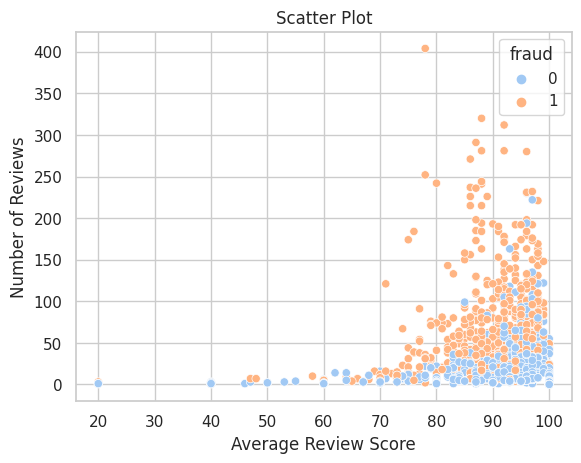

In [ ]:
sns.set(style='whitegrid')
sns.set_palette('Set3')

# Scatter plot with different colors for fraud vs non-fraud
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', hue='fraud', data=df, palette='pastel')

# Adding labels and title
plt.xlabel('Average Review Score')
plt.ylabel('Number of Reviews')
plt.title('Scatter Plot')

# Display the plot
plt.show()

## 2.7 Boxplot of *price* vs *fraud*

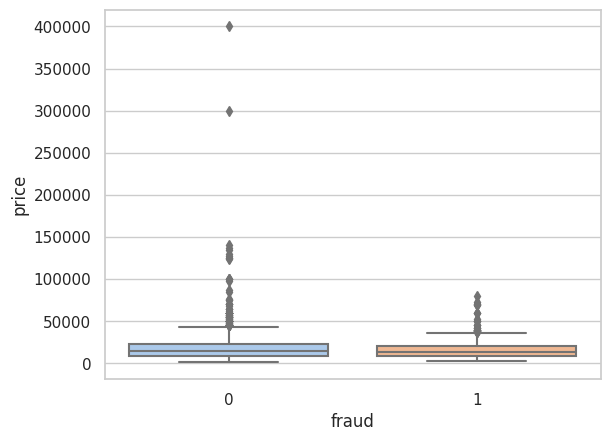

In [ ]:
sns.set(style='whitegrid')
sns.set_palette('pastel')

# Box plot of price against fraud
sns.boxplot(x='fraud', y='price', data=df)

plt.show()